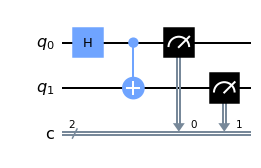

In [1]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure(0, 0)
circ.measure(1, 1)

circ.draw('mpl')

In [2]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit.test.mock import FakeValencia

backend = FakeValencia()

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))

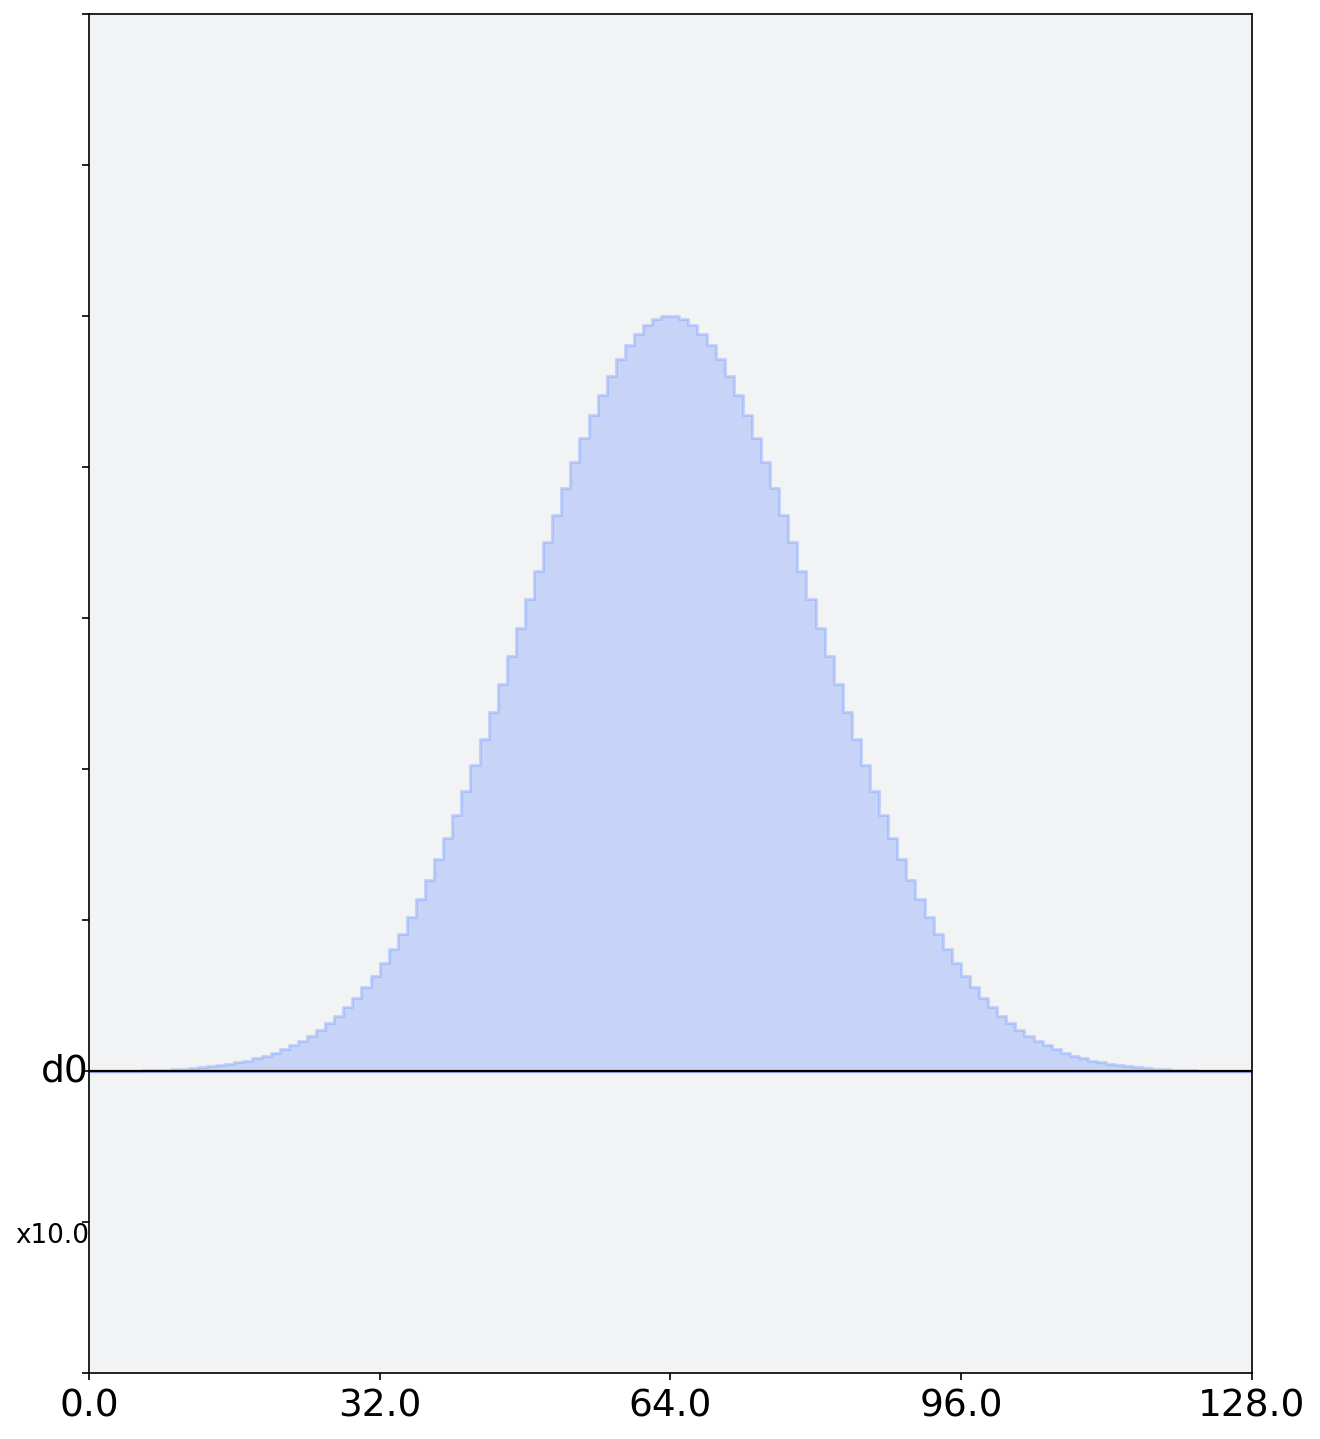

In [3]:
h_q0.draw()

In [5]:
circ.add_calibration('h', [0], h_q0)

['id', 'u1', 'u2', 'u3', 'cx']


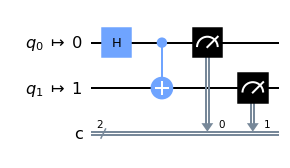

In [6]:
from qiskit import transpile
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

circ = transpile(circ, backend)

print(backend.configuration().basis_gates)
circ.draw('mpl', idle_wires=False)